# NAME - VAIBHAV SHRIVASTAV
# ASUID - 1229620381

# Linear regression [7 pts]

In this homework, you will implement solution algorithms for linear regression.


## Import libraries
Let's begin by importing some libraries. 

In [1]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline
import pandas as pd

Automatically created module for IPython interactive environment


## Load dataset

Now, we are importing a dataset of diabetes. You can check the details on this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset. 

The dataset consists of 442 observations with 10 attributes ($X$) that may affect the progression of diabetes ($y$). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n$ = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('The shape of the input features:',diabetes_X.shape)
print('The shape of the output varaible:',diabetes_y.shape)

The shape of the input features: (442, 10)
The shape of the output varaible: (442,)


We will choose just one attribute from the ten attributes as an input variable.

In [3]:
# Use only one feature
diabetes_X_one = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_one.shape)

(442, 1)


## Dataset split

Now, we split the dataset into two parts: training set and test set. 

- training set: 422 samples
- test set: 20 samples 

In [4]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_one[:-20]
diabetes_X_test = diabetes_X_one[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('Training input variable shape:', diabetes_X_train.shape)
print('Test input variable shape:', diabetes_X_test.shape)

Training input variable shape: (422, 1)
Test input variable shape: (20, 1)


## Linear regression 

Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks: 

- [3pts] implement \textbf{your own version} of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, )
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[IMPORTANT] Do not just call the least square function from libraries, for example, 
scipy.optimize.least_squares from scipy. Doing so will result in 0 point. Using helping functions such as numpy.linalg.inv is okay. 

- [3pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[NOTE] Notice that the loss function is mean-squared error. 

- [1pts] derive the analytical expression of the gradient if the loss is defined as 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

### TASK 1
Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks: 

- [3pts] implement \textbf{your own version} of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, )
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[IMPORTANT] Do not just call the least square function from libraries, for example, 
scipy.optimize.least_squares from scipy. Doing so will result in 0 point. Using helping functions such as numpy.linalg.inv is okay. 


Plotting data

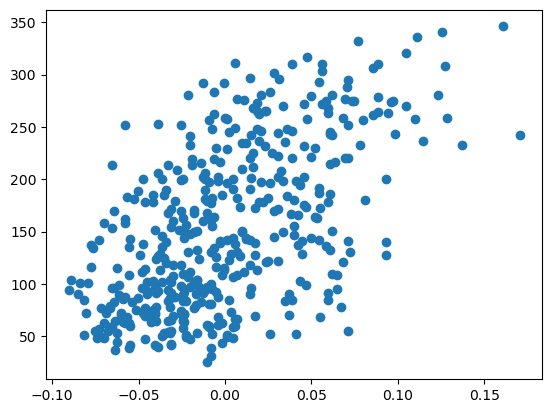

In [5]:
plt.scatter(diabetes_X_one, diabetes_y)

In [6]:
diabetes_X_train = diabetes_X_train.reshape(diabetes_X_train.shape[0])

Now we will use the Normal equation to find the optimal parameters for Least Square:

$\theta$ = (X<sup>T</sup>.X)<sup>-1</sup>.(X<sup>T</sup>.y)

In [7]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md

diabetes_X_train = diabetes_X_train.reshape(422)
ones = np.array([1]*422)
X = np.column_stack((ones, diabetes_X_train ))
XtXinv = np.linalg.inv(X.T.dot(X))
XtY = X.T.dot(diabetes_y_train)
opt_theta0, opt_theta1 = XtXinv.dot(XtY)

We find that the actual bestfit parameters are as following:<br>   $\theta$<sub>0</sub>: 152.91886182616113<br>$\theta$<sub>1</sub>: 938.2378612513527<br> Optimal Residual Sum of Squares: 834509.1890676939

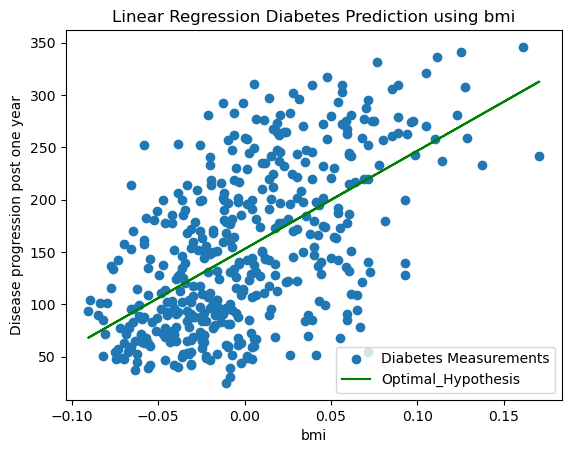

In [8]:
df = pd.DataFrame(columns=['x0', 'x1'])
df['x1'] = diabetes_X_train
df['x0'] = 1

df['opt_theta0'] = opt_theta0
df['opt_theta1'] = opt_theta1
df['opt_h0'] = df['opt_theta0']*df['x0'] + df['opt_theta1']*df['x1']

opt_lss = 0
for i in range(len(df)):
    opt_lss += (diabetes_y_train[i] - df.iloc[i]['opt_h0']) ** 2
opt_lss /= 2

plt.scatter(diabetes_X_one, diabetes_y, label = 'Diabetes Measurements')
plt.xlabel('bmi')
plt.ylabel('Disease progression post one year')
plt.title('Linear Regression Diabetes Prediction using bmi')
plt.plot(df['x1'],df['opt_h0'], color = 'green', label = 'Optimal_Hypothesis')
plt.legend(loc = 'lower right')
md("We find that the actual bestfit parameters are as following:<br>\
   $\\theta$<sub>0</sub>: {}<br>$\\theta$<sub>1</sub>: {}<br> Optimal Residual Sum of Squares: {}".format(opt_theta0, opt_theta1, opt_lss))

### TASK 2
- [3pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[NOTE] Notice that the loss function is mean-squared error. 

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

Text(0.5, 1.0, 'Theta0 and Theta1 converging towards optimal values')

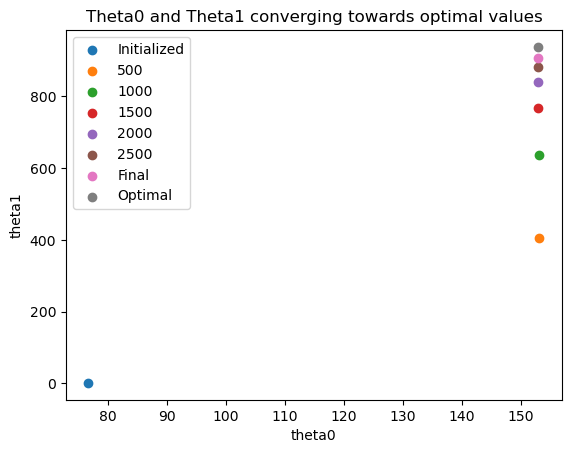

In [9]:
learning_rate = 0.5
iterations = 3000
gdd_theta0 = 0
gdd_theta1 = 0
n = len(diabetes_X_train)
for i in range(iterations):
    gdd_theta0 = gdd_theta0 - learning_rate*-np.sum(diabetes_y_train - gdd_theta0 - (gdd_theta1*diabetes_X_train))/n
    gdd_theta1 = gdd_theta1 - learning_rate*-np.sum((diabetes_y_train - gdd_theta0 - (gdd_theta1*diabetes_X_train))*diabetes_X_train)/n
    gdd_h0 = diabetes_X_train*gdd_theta1 + gdd_theta0*ones
    if i%500 == 0:
        if i ==0:
            plt.scatter(gdd_theta0, gdd_theta1, label = 'Initialized')
            continue
        plt.scatter(gdd_theta0, gdd_theta1, label = i)
    # print('theta0: {} \ntheta1: {}\n'.format(gdd_theta0, gdd_theta1))
plt.scatter(gdd_theta0, gdd_theta1, label = 'Final')
plt.scatter(opt_theta0, opt_theta1, label = 'Optimal')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.legend()
plt.title('Theta0 and Theta1 converging towards optimal values')

We find that the gdd bestfit parameters are as following:<br>   $\theta$<sub>0</sub>: 152.93371876060277<br>$\theta$<sub>1</sub>: 906.8926919089209<br> GDD Mean Squared Error: 3957.2449199639173

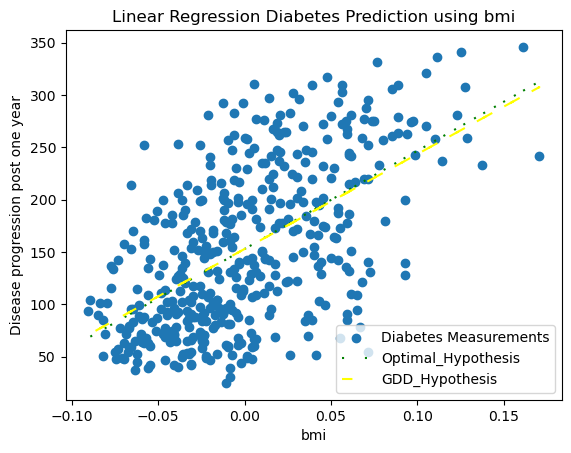

In [10]:
df['gdd_theta0'] = gdd_theta0
df['gdd_theta1'] = gdd_theta1
df['gdd_h0'] = df['gdd_theta0']*df['x0'] + df['gdd_theta1']*df['x1']

gdd_lss = 0
for i in range(len(df)):
    gdd_lss += (diabetes_y_train[i] - df.iloc[i]['gdd_h0']) ** 2
gdd_lss /= n

plt.scatter(diabetes_X_one, diabetes_y, label = 'Diabetes Measurements')
plt.xlabel('bmi')
plt.ylabel('Disease progression post one year')
plt.title('Linear Regression Diabetes Prediction using bmi')
plt.plot(df['x1'],df['opt_h0'], color = 'green', label = 'Optimal_Hypothesis', linestyle = (0,(1,10)))
plt.plot(df['x1'],df['gdd_h0'], color = 'yellow', label = 'GDD_Hypothesis', linestyle = (0,(5,10)))
plt.legend(loc = 'lower right')
md("We find that the gdd bestfit parameters are as following:<br>\
   $\\theta$<sub>0</sub>: {}<br>$\\theta$<sub>1</sub>: {}<br> GDD Mean Squared Error: {}".format(gdd_theta0, gdd_theta1, gdd_lss))

In [11]:
df

,x0,x1,opt_theta0,opt_theta1,opt_h0,gdd_theta0,gdd_theta1,gdd_h0
0,1,0.061696,152.918862,938.237861,210.804579,152.933719,906.892692,208.885558
1,1,-0.051474,152.918862,938.237861,104.623949,152.933719,906.892692,106.252269
2,1,0.044451,152.918862,938.237861,194.624673,152.933719,906.892692,193.246199
3,1,-0.011595,152.918862,938.237861,142.039980,152.933719,906.892692,142.418285
4,1,-0.036385,152.918862,938.237861,118.781366,152.933719,906.892692,119.936707
...,...,...,...,...,...,...,...,...
417,1,0.071397,152.918862,938.237861,219.905776,152.933719,906.892692,217.682697
418,1,-0.024529,152.918862,938.237861,129.905051,152.933719,906.892692,130.688766
419,1,-0.054707,152.918862,938.237861,101.590216,152.933719,906.892692,103.319889
420,1,-0.036385,152.918862,938.237861,118.781366,152.933719,906.892692,119.936707


## Task 3
- [1pts] derive the analytical expression of the gradient if the loss is defined as 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

## Answer

$$ \theta_0 = \sum_{i=1}^N(y^{(i)} - \theta_0 - \theta_1.x^{(i)}) + {\lambda}\theta_0 $$
$$ \theta_1 = \sum_{i=1}^N(y^{(i)} - \theta_0 - \theta_1.x^{(i)}).x^{(i)} + {\lambda}\theta_1 $$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

In [30]:
#Using sklearn to confirm answers
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(diabetes_X_train.reshape(-1,1), diabetes_y_train.reshape(-1,1))
reg.intercept_, reg.coef_

(array([152.91886183]), array([[938.23786125]]))